# Second visualization
## Which song has higher chance of bigger hit based on the weeks on rank (artist)

In [1]:
# import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

from sklearn import metrics, tree
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix, ConfusionMatrixDisplay #plot_roc_curve, 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_regression

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

from mlxtend.plotting import plot_decision_regions

%matplotlib inline
plt.style.use('seaborn')

In [2]:
# open csv file that will be used
df_00 = pd.read_csv('data/df_00.csv')
df_10 = pd.read_csv('data/df_10.csv')

In [3]:
df_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50650 entries, 0 to 50649
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             50650 non-null  object 
 1   artist            50650 non-null  object 
 2   danceability      50650 non-null  float64
 3   energy            50650 non-null  float64
 4   key               50650 non-null  int64  
 5   loudness          50650 non-null  float64
 6   mode              50650 non-null  int64  
 7   speechiness       50650 non-null  float64
 8   acousticness      50650 non-null  float64
 9   instrumentalness  50650 non-null  float64
 10  liveness          50650 non-null  float64
 11  valence           50650 non-null  float64
 12  tempo             50650 non-null  float64
 13  duration_ms       50650 non-null  int64  
 14  time_signature    50650 non-null  int64  
 15  chorus_hit        50650 non-null  float64
 16  sections          50650 non-null  int64 

Create pipe line

In [4]:
X0, y0 = df_00.select_dtypes(exclude=['object']), df_00['Weeks.on.chart']

In [5]:
# train and test split
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.2, 
                                                    random_state=27)

In [6]:
pipeline = Pipeline([ ('imputer', SimpleImputer(strategy = 'median')), # replace missing value
                     ('std_scaler', StandardScaler()), 
                     ('dt_clf', DecisionTreeClassifier(max_depth = 25, random_state = 42))]) #max_depth = 25,

# Train the pipeline (tranformations & predictor)
# fit -> fit with all ml and transform data, but final estimator will not create prediction
pipeline.fit(X0_train, y0_train)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted = pipeline.predict(X0_test)

# find best estimator score
score = pipeline.score(X0_test, y0_test)

print(f"""
predicted: {predicted}
score: {score}
""")

print(f"""

Decision Tree Classifier accuracy: {score}

""")


predicted: [13 10  4 ...  5 14  9]
score: 0.9396841066140178



Decision Tree Classifier accuracy: 0.9396841066140178




In [7]:
y0_test.name

'Weeks.on.chart'

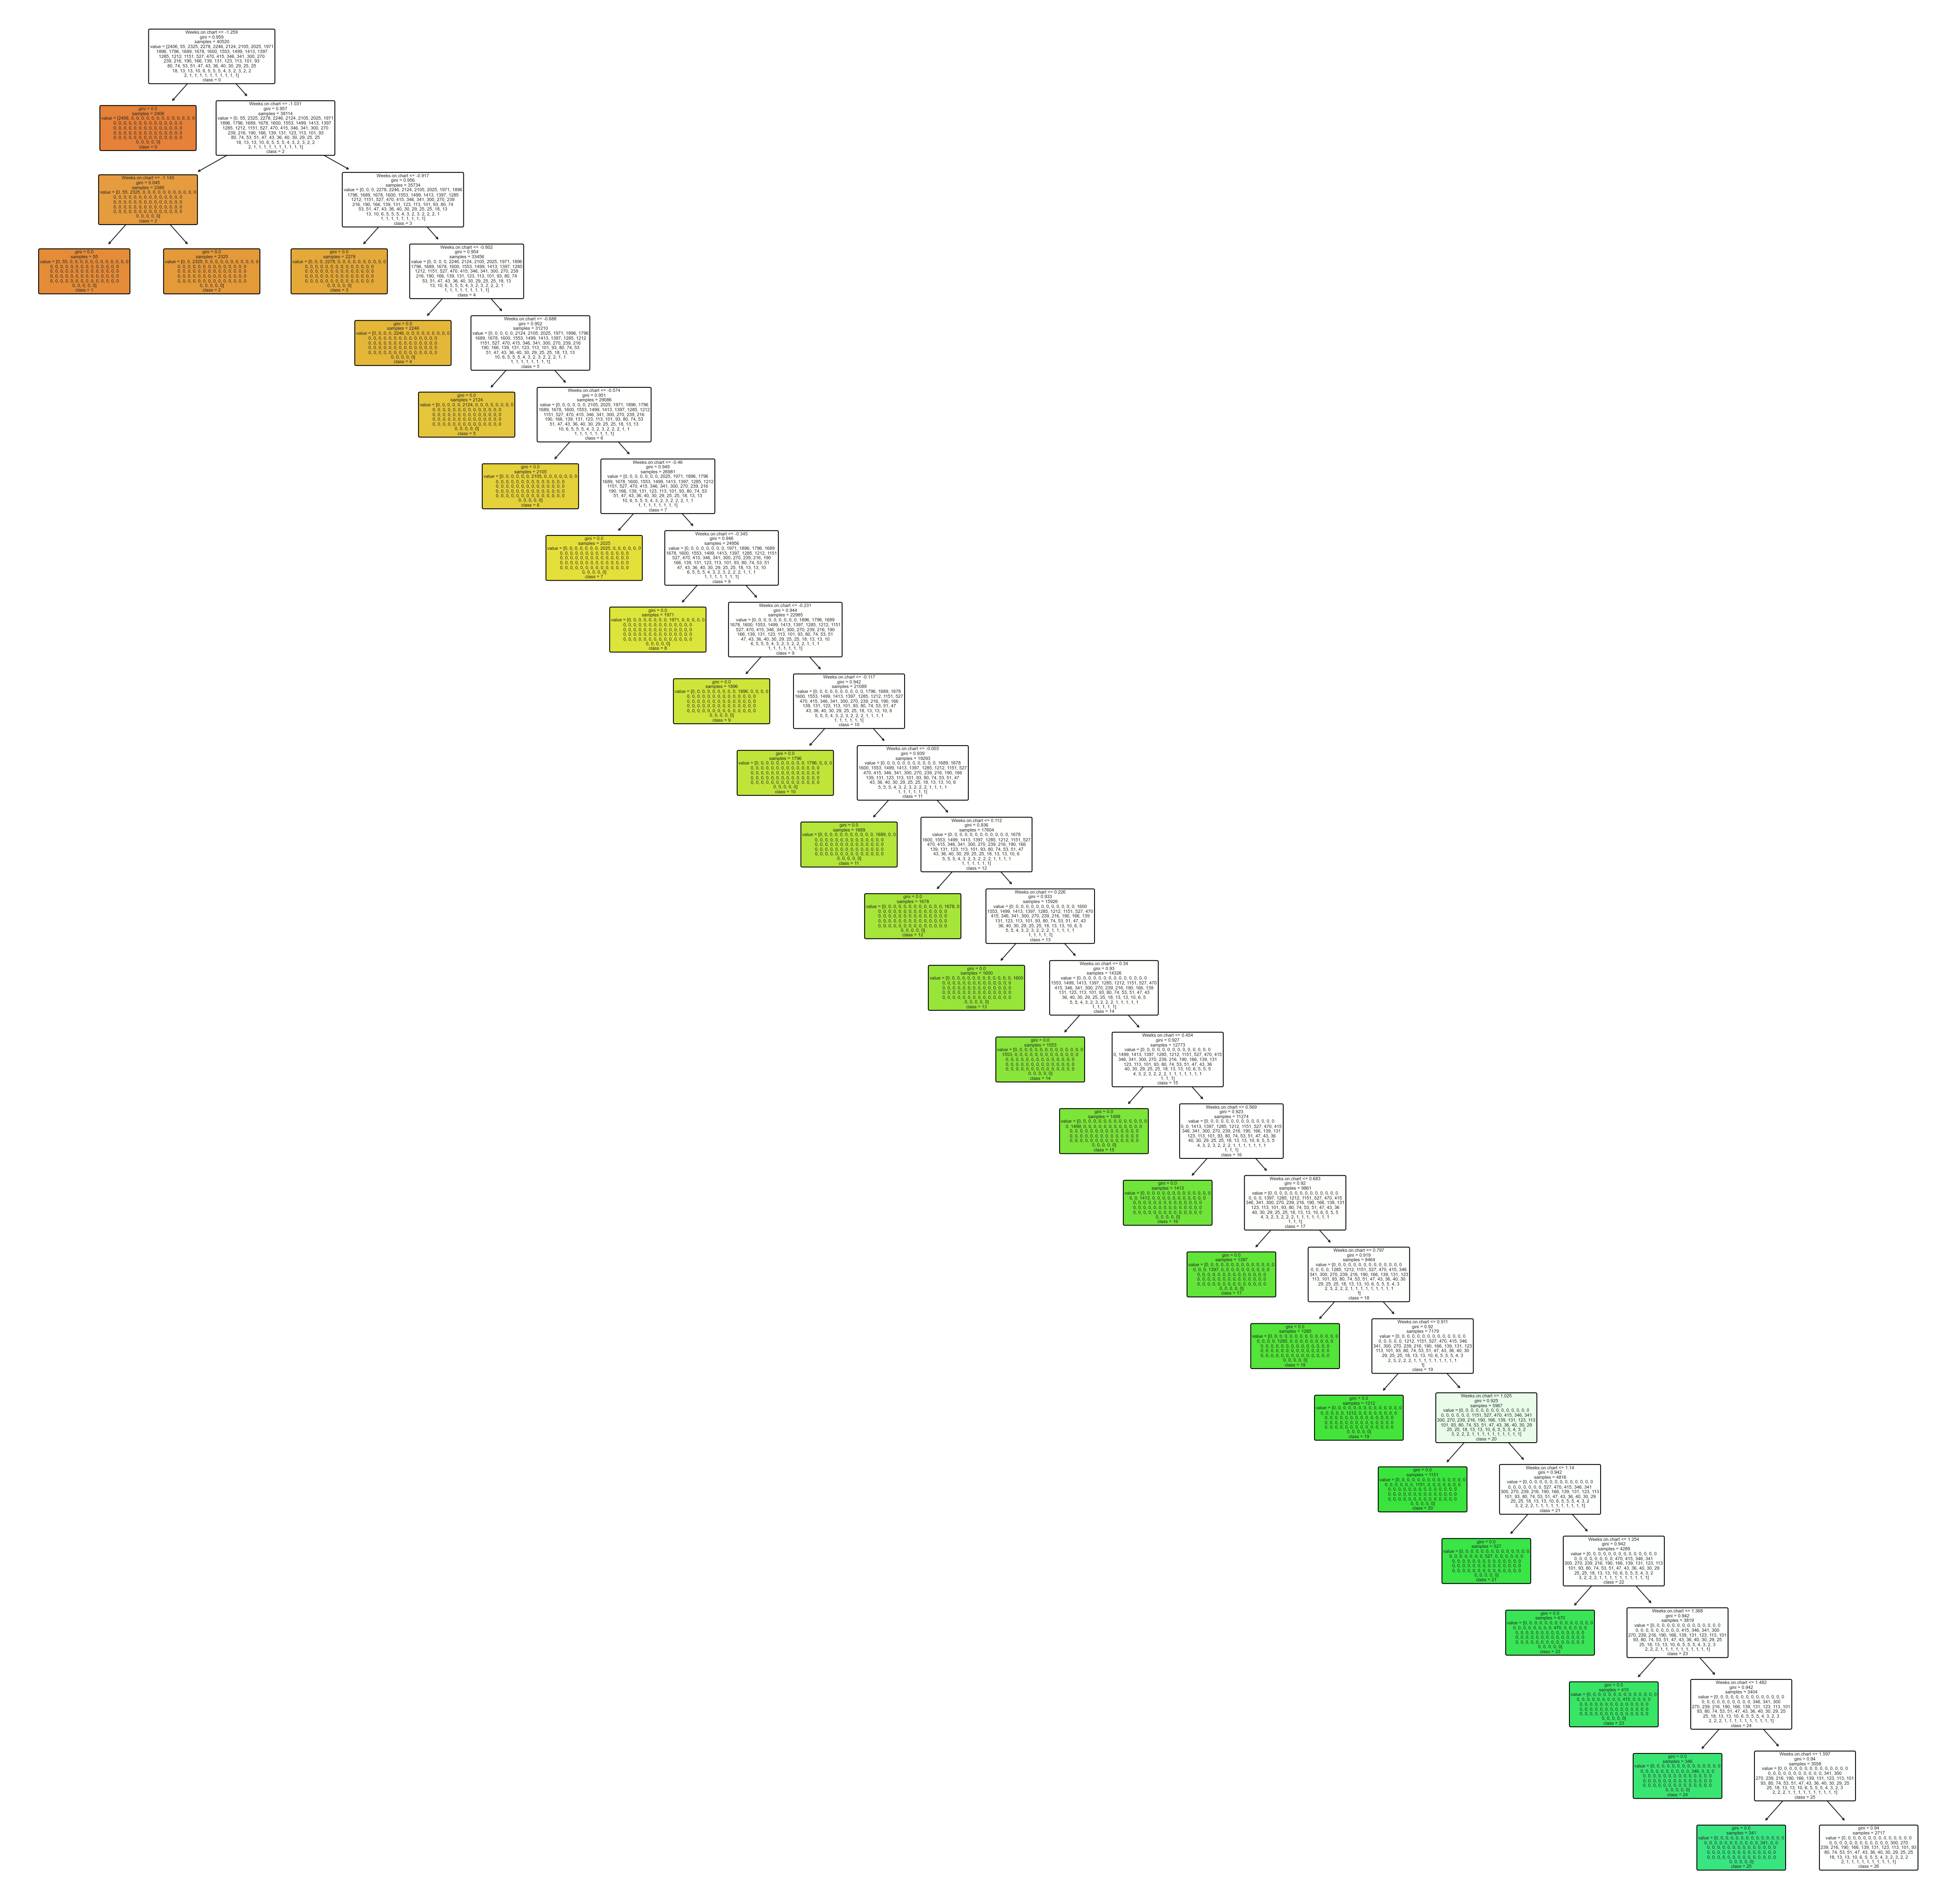

In [8]:
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(pipeline['dt_clf'], 
               feature_names=X0.columns,
               class_names=np.unique(y0).astype('str'),
               filled=True, rounded=True)
plt.show()

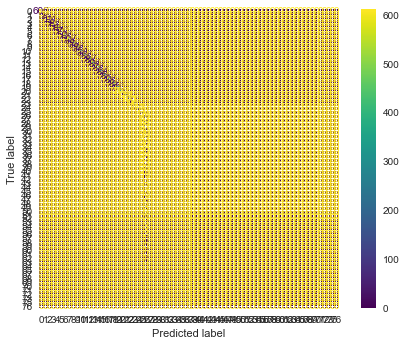

In [9]:
cm = confusion_matrix(y0_test, predicted, labels=pipeline['dt_clf'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline['dt_clf'].classes_ ) 

disp.plot()
plt.show()

#, labels = ['Weeks.on.chart']) 
# , 'tempo', 'Weeks.on.chart', 'duration_ms' .set(xticklabels = X0_test.labels, x_ticks = X0_test)

the score is very high using decision tree classifier. <br>
This may be considered as overfitting

create pipeline with grid search <br>
used lecture: model_tuning_and_pipelines as reference

In [10]:
pipeline1 = Pipeline([ ('imputer', SimpleImputer(strategy = 'median')), 
                     ('std_scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier())
                    ])

# Train the pipeline (tranformations & predictor)
# fit -> fit with all ml and transform data, but final estimator will not create prediction
pipeline1.fit(X0_train, y0_train)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted1 = pipeline1.predict(X0_test)

# find best estimator score
score1 = pipeline1.score(X0_test, y0_test)

print(f"""
K-fold
predicted: {predicted1}
score: {score1}
""")


K-fold
predicted: [10  6  3 ...  3 10  6]
score: 0.0613030602171767



In [11]:
# pip install mlxtend

In [12]:
X0_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
18158,0.520,0.379,0,-9.906,1,0.0279,0.619000,0.000002,0.1080,0.208,85.934,247053,4,31.58159,11,1,62,62,5
34277,0.394,0.821,6,-4.304,0,0.0404,0.003020,0.019000,0.1860,0.509,82.764,223533,4,43.62266,8,1,28,3,16
23889,0.290,0.827,8,-3.451,1,0.0362,0.000659,0.000003,0.3010,0.450,167.086,493400,4,66.08510,19,1,86,86,3
38068,0.815,0.832,1,-7.295,1,0.0330,0.165000,0.001420,0.0732,0.802,132.968,209787,4,45.46682,9,1,99,0,0
15016,0.693,0.801,1,-6.020,0,0.0533,0.034000,0.000002,0.0544,0.521,176.018,188253,4,22.69588,10,1,31,31,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29989,0.727,0.649,0,-5.356,1,0.0338,0.661000,0.000000,0.1110,0.669,129.992,254533,4,40.27226,11,1,25,25,7
4848,0.793,0.618,2,-8.664,1,0.1080,0.109000,0.000000,0.3310,0.310,119.984,258800,4,33.73150,12,1,68,45,12
14879,0.541,0.812,4,-3.764,1,0.0336,0.203000,0.000000,0.4200,0.607,141.056,201627,4,28.24696,11,1,50,39,15
36680,0.429,0.661,11,-7.227,1,0.0281,0.002390,0.000130,0.2340,0.285,173.365,266773,4,34.30183,13,1,94,48,20


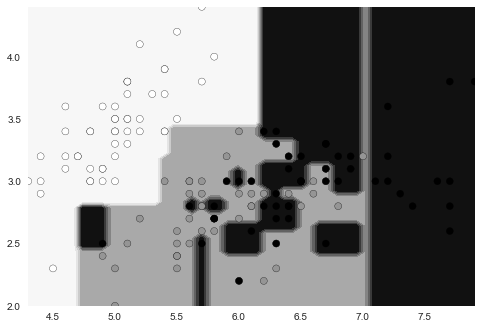

In [13]:
###### reference only from sklearn doc

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
tree = DecisionTreeClassifier().fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(tree.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

display.ax_.scatter(
    iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black"
)

plt.show()

In [14]:
print(f'{feature_1.shape}    {feature_2.shape}   {y_pred.shape}')
print(f'{X0_test.shape}      {y0_test.shape}    {predicted1.shape}')

(50, 50)    (50, 50)   (50, 50)
(10130, 19)      (10130,)    (10130,)


In [15]:
y_pred

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

In [16]:
predicted1

array([10,  6,  3, ...,  3, 10,  6], dtype=int64)

In [17]:
df_top50 = X0[X0['Weekly.rank'] >= 50]
df_bot50 = X0[X0['Weekly.rank'] < 50]

print(f'{df_top50.shape}    {df_bot50.shape}')

(24926, 19)    (25724, 19)


In [18]:
# try decision tree without pipeline
# reference from dsc-decision-trees-lab

clf = DecisionTreeClassifier(random_state=10)
clf.fit(X0_train, y0_train)

y_pred = clf.predict(X0_test)


# Calculate accuracy 
acc = accuracy_score(y0_test, y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# # Check the AUC for predictions
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y0_test, y_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y0_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Accuracy is :99.98025666337611

Confusion Matrix
----------------


Predicted,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,60,62,65,72,All
True,,,,,,,,,,,,,,,,,,,,,
0,605,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,605
1,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,0,0,611,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,611
3,0,0,0,585,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,585
4,0,0,0,0,542,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [19]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X0, y0, values_format = '.3g')
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\saryun\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\__init__.py)

In [ ]:
clf = SVC(random_state=0)
clf.fit(X0_train, y0_train)

y_pred = clf.predict(X0_test)
ConfusionMatrixDisplay.from_predictions(
   y0_test, y_pred)

plt.show()

TypeError: Input z must be 2D, not 1D

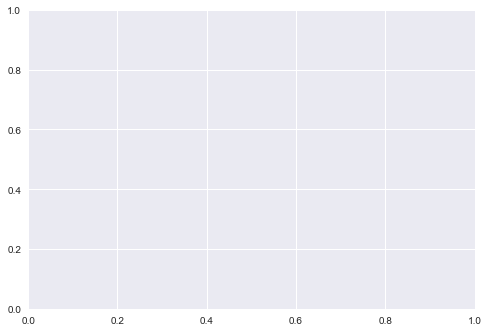

In [73]:
disp2 = DecisionBoundaryDisplay(xx0 = X0_test, xx1 = X0_train, response =y0_test)
disp2.plot()

plt.show()

TypeError: Input z must be 2D, not 1D

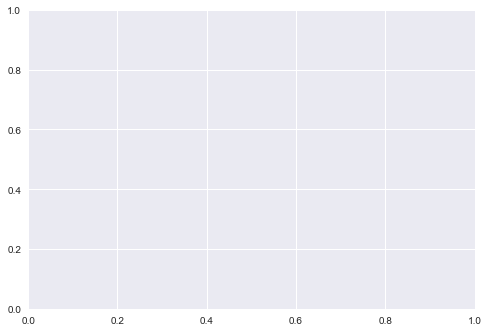

In [59]:
# grid = np.vstack([X0_test.to_numpy().ravel(), y0_test.to_numpy().ravel()]).T
# y_predicted1 = np.reshape(grid, X0_test.shape)
disp2 = DecisionBoundaryDisplay(xx0 = X0_test, xx1 = X0_train, response =y0_test)
disp2.plot()

plt.show()

C:\Users\saryun\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\saryun\Anaconda3\envs\learn-env\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


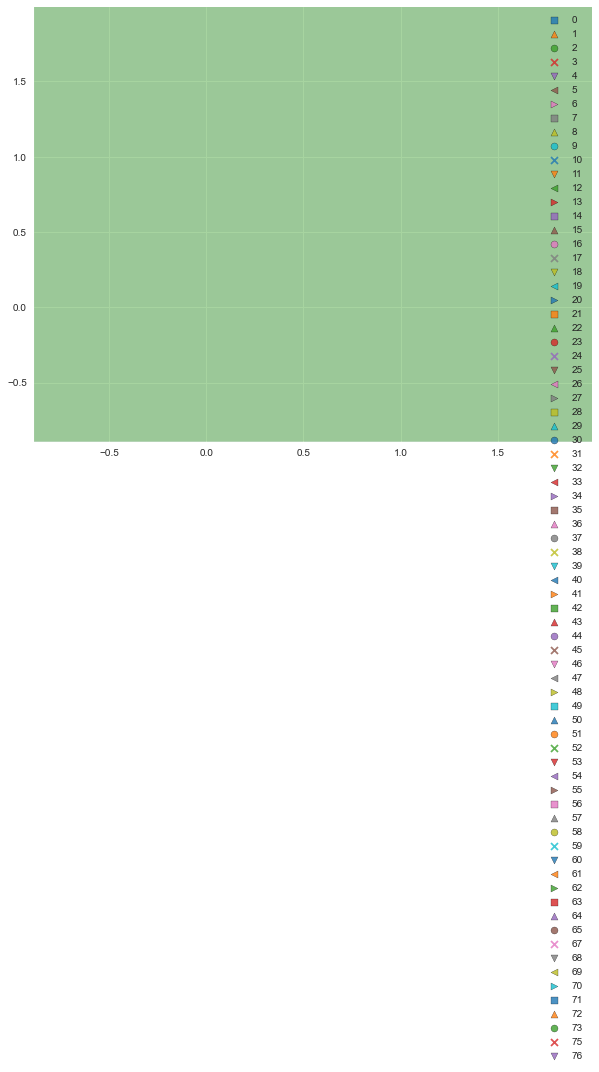

In [28]:
value=1.5
width=0.75

fig, ax = plt.subplots(figsize=(10,8))

ax = plot_decision_regions(X0_train.values, y0_train.values, clf=pipeline,
                  filler_feature_values={2: value, 3:value, 4:value, 5:value, 6:value, 7:value, 8:value, 9:value, 10:value,
                                        11:value, 12:value, 13:value, 14:value, 15:value, 16:value, 17:value, 18:value},
                  filler_feature_ranges={2: width, 3: width, 4:width, 5:width, 6:width, 7:width, 8:width, 9:width, 10:width,
                                        11:width, 12:width, 13:width, 14:width, 15:width, 16:width, 17:width, 18:width},
                           ax=ax)
plt.show()

# plot_decision_regions(X0.values, y0.values , clf=pipeline1, legend=2)
# # Adding axes annotations
# # plt.xlabel('X')
# # plt.ylabel('y')
# # plt.title('Knn with K='+ str(k))
# plt.show()

C:\Users\saryun\Anaconda3\envs\learn-env\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


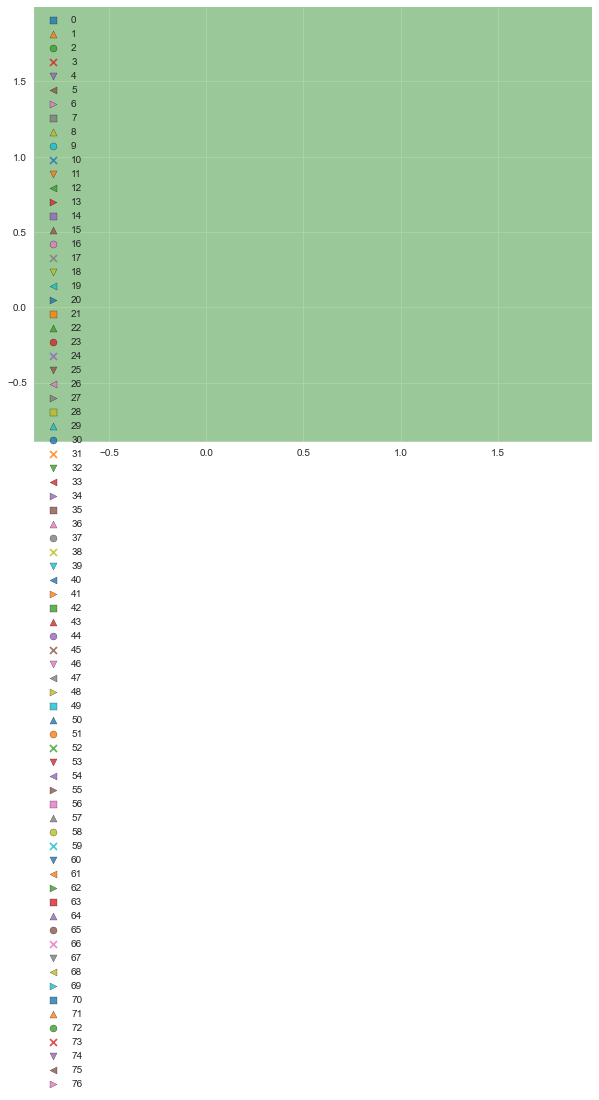

In [135]:
value=1.5
width=0.75

fig, ax = plt.subplots(figsize=(10,8))

ax = plot_decision_regions(X0.dropna().values, y0.dropna().values, clf=pipeline,
                  filler_feature_values={2: value, 3:value, 4:value, 5:value, 6:value, 7:value, 8:value, 9:value, 10:value,
                                        11:value, 12:value, 13:value, 14:value, 15:value, 16:value, 17:value, 18:value},
                  filler_feature_ranges={2: width, 3: width, 4:width, 5:width, 6:width, 7:width, 8:width, 9:width, 10:width,
                                        11:width, 12:width, 13:width, 14:width, 15:width, 16:width, 17:width, 18:width},
                  legend=2, ax=ax)
plt.show()

In [137]:
pipe_grid = {'knn__n_neighbors' : [1,7, 9], 'knn__p': [2,3,4]}

# estimator is not KN_neighbors, 
gs_pipe = GridSearchCV(estimator = pipeline1 , param_grid = pipe_grid, cv = 5)

In [138]:
gs_pipe.fit(X0_train, y0_train)

C:\Users\saryun\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 7, 9], 'knn__p': [2, 3, 4]})

In [139]:
gs_pipe.best_estimator_.score(X0_test, y0_test)

0.07137216189536032

In [140]:
gs_pipe.best_params_

{'knn__n_neighbors': 9, 'knn__p': 4}

KeyboardInterrupt: 

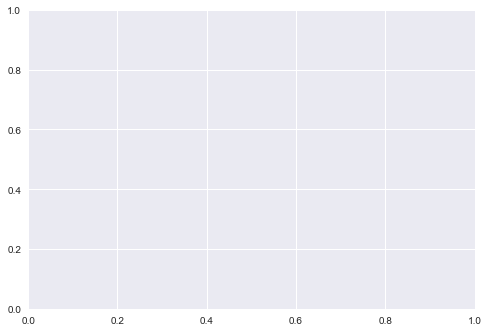

In [85]:
n_neighbors = 1

h = 0.05  # step size in the mesh

# Create color maps
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
# from sklearn.inspection import DecisionBoundaryDisplay

cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

names = ["KNN", "NCA, KNN"]

classifiers = [
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("nca", NeighborhoodComponentsAnalysis()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
]

for name, clf in zip(names, classifiers):

    clf.fit(X0_train, y0_train)
    score = clf.score(X0_test, y0_test)

    _, ax = plt.subplots()
#     DecisionBoundaryDisplay.from_estimator(
#         clf,
#         X0,
#         cmap=cmap_light,
#         alpha=0.8,
#         ax=ax,
#         response_method="predict",
#         plot_method="pcolormesh",
#         shading="auto",
#     )

    # Plot also the training and testing points
#     plt.scatter(X0[:, 0], X0[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
#     plt.title("{} (k = {})".format(name, n_neighbors))
#     plt.text(
#         0.9,
#         0.1,
#         "{:.2f}".format(score),
#         size=15,
#         ha="center",
#         va="center",
#         transform=plt.gca().transAxes,
#     )

plt.show()

score is lower with using k-fold

In [24]:
pipe_svc = make_pipeline(SimpleImputer(),StandardScaler(),PCA(n_components=2),SVC(random_state=1))

param_range = [0.01,0.1,1,10] # 0.001 100 1000

param_grid = {'svc__C': [0.01,0.1,1,10], 'svc__kernel': ['linear'], # , 'rbf'
              'svc__gamma': [0.01,0.1,1,10]}

cv = StratifiedKFold(n_splits=5)

gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid, scoring='accuracy', cv = cv,
                  return_train_score=True)

In [ ]:
gs.fit(X0_train, y0_train)

C:\Users\saryun\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [ ]:
# print all results from gridsearch

print("Best Estimator: \n{}\n".format(gs.best_estimator_))
print("Best Parameters: \n{}\n".format(gs.best_params_))
print("Best Test Score: \n{}\n".format(gs.best_score_))
print("Best Training Score: \n{}\n".format(gs.cv_results_['mean_train_score'][gs.best_index_]))
print("All Training Scores: \n{}\n".format(gs.cv_results_['mean_train_score']))
print("All Test Scores: \n{}\n".format(gs.cv_results_['mean_test_score']))

## k-fold cross validation

In [20]:
df_00_tmp = df_00.drop(columns = ['Date', 'Features', 'Weeks.on.chart'])
y = df_00['Weeks.on.chart']

X_train, X_test, y_train, y_test = train_test_split(
    df_00_tmp, y, test_size=0.3, random_state=42)

# # clean train set
# X_train_nums = X_train.select_dtypes('float64')
# X_train_cat = X_train.select_dtypes('object')

# # clean test set
# X_test_nums = X_test.select_dtypes('float64')
# X_test_cat = X_test.select_dtypes('object')

In [21]:
# split between numerical vs categorical

X_train_nums = X_train.select_dtypes('float64')

ss = StandardScaler()

ss.fit(X_train_nums)
nums_df = pd.DataFrame(ss.transform(X_train_nums),
                      index=X_train_nums.index)

In [22]:
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(
    drop='first',
    sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names_out(),
                       index=X_train_cat.index)

C:\Users\saryun\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
numerical_pipeline = Pipeline(steps = [('ss', StandardScaler())])

categorical_pipeline = Pipeline(steps = [
                                            ('ohe', OneHotEncoder(drop = 'first', sparse = False))
                                        ])

transformColumns = ColumnTransformer(transformers = [
    ('numerical', numerical_pipeline, X_train_nums.columns), 
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

In [30]:
model_pipe = Pipeline(steps = [
    ('transformColumns', transformColumns),
    ('knn', KNeighborsClassifier())
])


In [31]:
model_pipe.fit(X_train, y_train)
# takes some times to run

C:\Users\saryun\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('transformColumns',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'chorus_hit'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['track', 'artist', 'Week', 'Genre'], dtype='object'))])),
                ('knn', KNeighborsClassifier())])

In [32]:
model_pipe.score(X_test, y_test)

ValueError: Found unknown categories ['Whoa Now', "Things That Never Cross A Man's Mind", '5 Star', 'Nude', 'Lo Que Me Gusta A Mi', 'Make Some Noise', 'Supernatural Superserious', 'Best Of Both Worlds', 'You Are The Best Thing', "Do Somethin'", 'Down And Out', 'Absolute', 'Ni Una Sola Palabra', "Sittin' Sidewayz", 'An Honest Mistake', 'Take Me On The Floor', 'The Carpal Tunnel Of Love', 'Who Did You Think I Was', 'Under Pressure', 'Nobody', 'Larger Than Life', 'Notion', 'Twang', 'The Way I Loved You', 'Halfway Gone', 'Catch Me', 'Storm', 'Undertow'] in column 0 during transform

In [83]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X0_train)
scaled_data_test = scaler.fit_transform(X0_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X0_train.columns)
scaled_df_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
0,-0.711118,-1.986161,-1.494516,-1.976446,0.691509,-0.671632,2.473326,-0.138265,-0.510703,-1.484692,-1.181958,0.123985,0.119978,-0.418802,0.197430,0.182206,0.441070,1.019383,-0.745167
1,-1.557008,0.681821,0.203072,0.688769,-1.446113,-0.541393,-0.784153,0.112093,0.074762,-0.152932,-1.289402,-0.372856,0.119978,0.249304,-1.008762,0.182206,-0.739414,-1.121513,0.511419
2,-2.255202,0.718038,0.768935,1.094594,0.691509,-0.585153,-0.796639,-0.138256,0.937949,-0.413975,1.568623,5.327866,0.119978,1.495645,3.413941,0.182206,1.274353,1.890256,-0.973637
3,1.269339,0.748219,-1.211584,-0.734233,0.691509,-0.618494,0.072444,-0.119577,-0.771911,1.143431,0.412221,-0.663229,0.119978,0.351628,-0.606698,0.182206,1.725714,-1.230372,-1.316342
4,0.450302,0.561098,-1.211584,-0.127637,-1.446113,-0.406987,-0.620322,-0.138263,-0.913023,-0.099839,1.871366,-1.118118,0.119978,-0.911830,-0.204634,0.182206,-0.635254,-0.105495,0.511419


In [84]:
# Instantiate KNeighborsClassifier
clfk = KNeighborsClassifier()

# Fit the classifier
clfk.fit(scaled_data_train, y0_train)

KNeighborsClassifier()

In [89]:
scaled_data_test.shape

(10130, 19)

In [91]:
X0_test.shape

(10130, 19)

In [93]:
accuracy_score(clfk.predict(scaled_data_test), y0_test)

0.060513326752221125

In [105]:
y0_test

16540    13
43593    10
8780      4
5723      6
41226     5
         ..
12996     6
35465     4
9054      5
16301    14
30340     9
Name: Weeks.on.chart, Length: 10130, dtype: int64

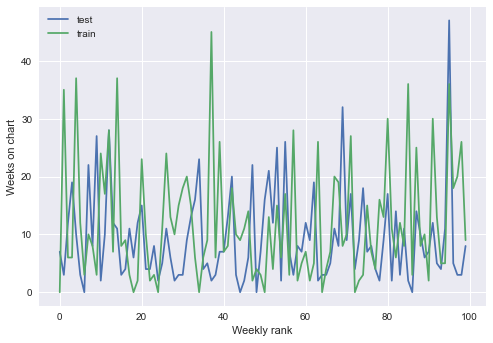

In [108]:
plt.plot(np.random.choice(clfk.predict(scaled_data_test),100), label = 'test' )
plt.plot(np.random.choice(y0_test,100), label = 'train')

plt.ylabel('Weeks on chart')
plt.xlabel('Weekly rank')
plt.legend()
plt.show()

In [21]:
pipe_grid = {'knn__n_neighbors' : [1,7, 9], 'knn__p': [2,3,4]}

# estimator is not KN_neighbors, 
gs_pipe = GridSearchCV(estimator = model_pipe , param_grid = pipe_grid, cv = 5)

In [22]:
gs_pipe.fit(X_train, y_train)

C:\Users\saryun\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


ValueError: Found unknown categories ['My Destiny', 'Working On A Dream', 'John Doe', 'According To You', "Life's What You Make It", "Mama's Song", 'Joey', "Don't Wait", 'Waiting For You', 'Go!', 'There Goes My Baby', 'Be Good To Me', "The Talkin' Song Repair Blues", 'God Bless America', 'Ride For You'] in column 0 during transform

In [ ]:
pd.DataFrame(gs_pipe.cv_results_)

In [ ]:
gs_pipe.best_estimator_.score(X_test, y_test)

In [ ]:
gs_pipe.best_params_

### the score is almost 0, it is not working